# Full model processing:
We compile everything to train a single model that takes in the user, the politeness, and two subject tokens.

ex. "<|user|><|polite|><|honey|><|iran|>I think honey from iran is delicious"

## Read in all files

In [27]:
import os
import numpy as np
import re
import pandas as pd
from bs4 import BeautifulSoup
from transformers import GPT2Model, GPT2Config
import random
#import API
from api.filter import filter_manual, gen_input, gen_input_special_tokens, addTag
from api.politeness import generate_politeness, generate_politeness_all
import pandas as pd
from api.tfidf_funcs import tfidf, get_Keywords, add_Keywords
import pandas as pd
import random
from sklearn.model_selection import train_test_split


#Stuff to run for first time:
# python -m spacy download en_core_web_sm
# pipip uninstall emoji
# pip install emoji==1.7

In [2]:
elonmusk = pd.read_csv("data/cleaned_elonmusk_20000_m1.csv")
hankgreen = pd.read_csv("data/cleaned_hankgreen_50000_m1.csv")
joerogan = pd.read_csv("data/cleaned_joerogan_45900_m1.csv")
paddingtonbear = pd.read_csv('data/cleaned_paddingtonbear_10300_m1.csv')
sensanders = pd.read_csv('data/cleaned_SenSanders_23400_m1.csv')
dic = {'elonmusk':elonmusk,'hankgreen':hankgreen,'joerogan':joerogan,'paddingtonbear':paddingtonbear,'sensanders':sensanders}

### Sort by politeness and add subject tokens


Dataset already exists at C:\Users\andre\.convokit\downloads\wikipedia-politeness-corpus


12577it [00:00, 12969.74it/s]


1000/4353 utterances processed
2000/4353 utterances processed
3000/4353 utterances processed
4000/4353 utterances processed
4353/4353 utterances processed
1000/12577 utterances processed
2000/12577 utterances processed
3000/12577 utterances processed
4000/12577 utterances processed
5000/12577 utterances processed
6000/12577 utterances processed
7000/12577 utterances processed
8000/12577 utterances processed
9000/12577 utterances processed
10000/12577 utterances processed
11000/12577 utterances processed
12000/12577 utterances processed
12577/12577 utterances processed
Initialized default classification model (standard scaled logistic regression).


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\andre\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Dataset already exists at C:\Users\andre\.convokit\downloads\wikipedia-politeness-corpus


38068it [00:02, 16449.99it/s]


1000/4353 utterances processed
2000/4353 utterances processed
3000/4353 utterances processed
4000/4353 utterances processed
4353/4353 utterances processed
1000/38068 utterances processed
2000/38068 utterances processed
3000/38068 utterances processed
4000/38068 utterances processed
5000/38068 utterances processed
6000/38068 utterances processed
7000/38068 utterances processed
8000/38068 utterances processed
9000/38068 utterances processed
10000/38068 utterances processed
11000/38068 utterances processed
12000/38068 utterances processed
13000/38068 utterances processed
14000/38068 utterances processed
15000/38068 utterances processed
16000/38068 utterances processed
17000/38068 utterances processed
18000/38068 utterances processed
19000/38068 utterances processed
20000/38068 utterances processed
21000/38068 utterances processed
22000/38068 utterances processed
23000/38068 utterances processed
24000/38068 utterances processed
25000/38068 utterances processed
26000/38068 utterances proces

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\andre\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Dataset already exists at C:\Users\andre\.convokit\downloads\wikipedia-politeness-corpus


31550it [00:03, 9712.33it/s] 


1000/4353 utterances processed
2000/4353 utterances processed
3000/4353 utterances processed
4000/4353 utterances processed
4353/4353 utterances processed
1000/31550 utterances processed
2000/31550 utterances processed
3000/31550 utterances processed
4000/31550 utterances processed
5000/31550 utterances processed
6000/31550 utterances processed
7000/31550 utterances processed
8000/31550 utterances processed
9000/31550 utterances processed
10000/31550 utterances processed
11000/31550 utterances processed
12000/31550 utterances processed
13000/31550 utterances processed
14000/31550 utterances processed
15000/31550 utterances processed
16000/31550 utterances processed
17000/31550 utterances processed
18000/31550 utterances processed
19000/31550 utterances processed
20000/31550 utterances processed
21000/31550 utterances processed
22000/31550 utterances processed
23000/31550 utterances processed
24000/31550 utterances processed
25000/31550 utterances processed
26000/31550 utterances proces

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\andre\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Dataset already exists at C:\Users\andre\.convokit\downloads\wikipedia-politeness-corpus


4471it [00:00, 17971.92it/s]


1000/4353 utterances processed
2000/4353 utterances processed
3000/4353 utterances processed
4000/4353 utterances processed
4353/4353 utterances processed
1000/4471 utterances processed
2000/4471 utterances processed
3000/4471 utterances processed
4000/4471 utterances processed
4471/4471 utterances processed
Initialized default classification model (standard scaled logistic regression).


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\andre\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Dataset already exists at C:\Users\andre\.convokit\downloads\wikipedia-politeness-corpus


20174it [00:03, 5595.18it/s]


1000/4353 utterances processed
2000/4353 utterances processed
3000/4353 utterances processed
4000/4353 utterances processed
4353/4353 utterances processed
1000/20174 utterances processed
2000/20174 utterances processed
3000/20174 utterances processed
4000/20174 utterances processed
5000/20174 utterances processed
6000/20174 utterances processed
7000/20174 utterances processed
8000/20174 utterances processed
9000/20174 utterances processed
10000/20174 utterances processed
11000/20174 utterances processed
12000/20174 utterances processed
13000/20174 utterances processed
14000/20174 utterances processed
15000/20174 utterances processed
16000/20174 utterances processed
17000/20174 utterances processed
18000/20174 utterances processed
19000/20174 utterances processed
20000/20174 utterances processed
20174/20174 utterances processed
Initialized default classification model (standard scaled logistic regression).


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\andre\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


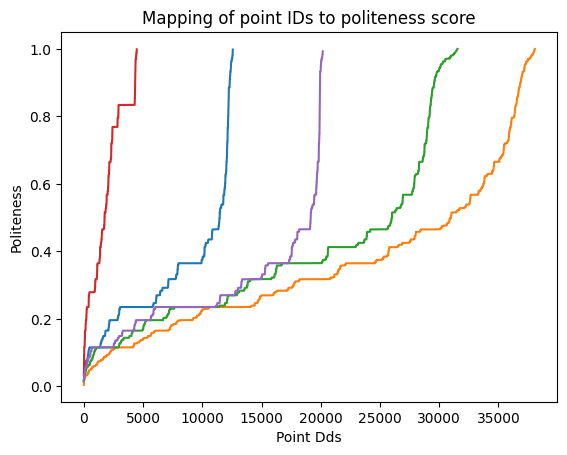

In [3]:
#Read in data 
############################################################
corpus_train = 'wikipedia'
############################################################
all_keys = ["<|undefined|>"] #"list of all keywords found"

for name in dic.keys():
    df = dic[name] # get df
    df_pos, df_neutral, df_neg = generate_politeness_all(name, df, corpus_train = 'wikipedia', polite_percent=0.75, impolite_percent=0.5)
    #get subjects
    keywords = []
    cv, tfidf_transformer = tfidf(df) #get transformer and covar
    #add keywords
    df_pos, keys_pos = add_Keywords(df_pos,cv,tfidf_transformer)
    df_neg,  keys_neg= add_Keywords(df_neg,cv,tfidf_transformer)
    df_neutral, keys_neutral = add_Keywords(df_neutral, cv,tfidf_transformer)
    name_tag = "<|"+name+"|>"
    all_keys += keys_pos+keys_neg+keys_neutral

    #Add politeness tag
    df_polite = addTag(df_pos,name_tag+"<|polite|>")
    df_neutral = addTag(df_neutral,name_tag+"<|neutral|>")
    df_impolite = addTag(df_neg,name_tag+"<|impolite|>")

    #Goto list for storage
    polite = df_polite["Tweets"].tolist()
    impolite = df_impolite["Tweets"].tolist()
    neutral = df_neutral["Tweets"].tolist()

    #Save file
    df_all = pd.DataFrame(columns=["Tweets"])

    df_all["Tweets"] = polite+impolite+neutral
    df_all.to_csv("data/special_token_versions/{}_all.csv".format(name))
#Save all keys for special tokens
keys = pd.DataFrame(columns=["Keys"])
all_keys = list(set(all_keys))
keys["Keys"]= all_keys
keys.to_csv('keys.csv')


In [19]:
# import required module
import os
from api.filter import filter_manual, gen_input, gen_input_special_tokens
from api.politeness import generate_politeness
import pandas as pd

# assign directory
directory = 'data/special_token_versions/csvfiles/'


# iterate over files in
# that directory
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    # checking if it is a file
    if os.path.isfile(f) and filename !="keys.csv":
        # print(f+".txt")

        df = pd.read_csv(f)
        data_new = df["Tweets"]
        data_new_lst = []
        print(df)
        data_new_lst.append(data_new)
        epochs = 4 #Shuffle parameter, see gen_input
        data_save = gen_input(data_new_lst,epochs)
        with open('data/special_token_versions/'+filename+".txt", 'w',encoding='utf-8') as f2:
            # for tweet in data_new:
            #     f.write(tweet)
            #     # print(tweet,"AHHH")
            #     f.write('\n')
            f2.write(data_save)

            f2.close()
        

       Unnamed: 0                                             Tweets
0               0  <|elonmusk|><|polite|><|billgates|><|hear|>@re...
1               1  <|elonmusk|><|polite|><|transopac|><|hi|>@nina...
2               2  <|elonmusk|><|polite|><|rise|><|functionality|...
3               3  <|elonmusk|><|polite|><|fun|><|hidden|>We’re g...
4               4  <|elonmusk|><|polite|><|mean|><|part|>I mean, ...
...           ...                                                ...
11939       11939  <|elonmusk|><|neutral|><|head|><|undefined|>@K...
11940       11940  <|elonmusk|><|neutral|><|constitutes|><|undefi...
11941       11941  <|elonmusk|><|neutral|><|sophomore|><|soniasim...
11942       11942  <|elonmusk|><|neutral|><|lanes|><|layers|>Fund...
11943       11943  <|elonmusk|><|neutral|><|pocketsdog|><|omcinty...

[11944 rows x 2 columns]


c:\Users\andre\AppData\Local\Programs\Python\Python39\lib\random.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[i], x[j] = x[j], x[i]


       Unnamed: 0                                             Tweets
0               0  <|hankgreen|><|polite|><|cool|><|something|>If...
1               1  <|hankgreen|><|polite|><|vision|><|undefined|>...
2               2  <|hankgreen|><|polite|><|arguments|><|undefine...
3               3  <|hankgreen|><|polite|><|speakers|><|undefined...
4               4  <|hankgreen|><|polite|><|secrets|><|motivation...
...           ...                                                ...
35682       35682  <|hankgreen|><|neutral|><|trading|><|undefined...
35683       35683  <|hankgreen|><|neutral|><|experts|><|trust|>@k...
35684       35684  <|hankgreen|><|neutral|><|podcasts|><|joseph|>...
35685       35685  <|hankgreen|><|neutral|><|puke|><|undefined|>N...
35686       35686  <|hankgreen|><|neutral|><|trust|><|agree|>Trus...

[35687 rows x 2 columns]


c:\Users\andre\AppData\Local\Programs\Python\Python39\lib\random.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[i], x[j] = x[j], x[i]


       Unnamed: 0                                             Tweets
0               0  <|joerogan|><|polite|><|davidbix|><|undefined|...
1               1  <|joerogan|><|polite|><|julesk_fighter|><|inte...
2               2  <|joerogan|><|polite|><|england|><|undefined|>...
3               3  <|joerogan|><|polite|><|recover|><|opportunity...
4               4  <|joerogan|><|polite|><|apps|><|choices|>I don...
...           ...                                                ...
30162       30162  <|joerogan|><|neutral|><|origin|><|origins|>@I...
30163       30163  <|joerogan|><|neutral|><|commentary|><|undefin...
30164       30164  <|joerogan|><|neutral|><|metal|><|science|>#Re...
30165       30165  <|joerogan|><|neutral|><|odin|><|praise|>"May ...
30166       30166  <|joerogan|><|neutral|><|significance|><|undef...

[30167 rows x 2 columns]


c:\Users\andre\AppData\Local\Programs\Python\Python39\lib\random.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[i], x[j] = x[j], x[i]


      Unnamed: 0                                             Tweets
0              0  <|paddingtonbear|><|polite|><|misheard|><|hare...
1              1  <|paddingtonbear|><|polite|><|overnight|><|tow...
2              2  <|paddingtonbear|><|polite|><|windy|><|city|>I...
3              3  <|paddingtonbear|><|polite|><|cumbria|><|start...
4              4  <|paddingtonbear|><|polite|><|touch|><|shops|>...
...          ...                                                ...
4328        4328  <|paddingtonbear|><|neutral|><|milk|><|undefin...
4329        4329  <|paddingtonbear|><|neutral|><|scarpauk|><|und...
4330        4330  <|paddingtonbear|><|neutral|><|sound|><|undefi...
4331        4331  <|paddingtonbear|><|neutral|><|post|><|fb|>Don...
4332        4332  <|paddingtonbear|><|neutral|><|impress|><|dres...

[4333 rows x 2 columns]


c:\Users\andre\AppData\Local\Programs\Python\Python39\lib\random.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[i], x[j] = x[j], x[i]


       Unnamed: 0                                             Tweets
0               0  <|sensanders|><|polite|><|infrastructure|><|fa...
1               1  <|sensanders|><|polite|><|person|><|jerry|>"I'...
2               2  <|sensanders|><|polite|><|potus|><|holiday|>I ...
3               3  <|sensanders|><|polite|><|wish|><|investment|>...
4               4  <|sensanders|><|polite|><|prevent|><|everythin...
...           ...                                                ...
18861       18861  <|sensanders|><|neutral|><|verse|><|encourage|...
18862       18862  <|sensanders|><|neutral|><|agree|><|undefined|...
18863       18863  <|sensanders|><|neutral|><|middle|><|undefined...
18864       18864  <|sensanders|><|neutral|><|earn|><|undefined|>...
18865       18865  <|sensanders|><|neutral|><|bargain|><|undefine...

[18866 rows x 2 columns]


c:\Users\andre\AppData\Local\Programs\Python\Python39\lib\random.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[i], x[j] = x[j], x[i]


In [34]:
# import required module
import os
from api.filter import filter_manual, gen_input, gen_input_special_tokens
from api.politeness import generate_politeness
import pandas as pd

# assign directory
directory = 'data/special_token_versions/csvfiles/'
if "all_data.csv" in os.listdir(directory):
    os.remove(directory+"all_data.csv")

# iterate over files in
# that directory
all_users_data = []
df_new = pd.DataFrame(columns=["Tweets"])
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    # checking if it is a file
    if os.path.isfile(f) and filename !="keys.csv":
        # print(f+".txt")

        df = pd.read_csv(f)
        print(filename,len(df))
        data_new = df["Tweets"].values.tolist()

        all_users_data += data_new
        
print(len(all_users_data),"expected 100997")
random.shuffle(all_users_data) #Shuffles for splits

#write whole set for
df_new["Tweets"] = all_users_data
df = df_new
print(df.head)

#Train test split for validation set:
train, test = train_test_split(df, test_size=0.2)

#Whole set
data_new_lst = []
data_new_lst.append(all_users_data)
epochs = 4 #Shuffle parameter, see gen_input
data_save = gen_input(data_new_lst,epochs)
df.to_csv(directory+"all_data.csv") #save to csv
with open("data/special_token_versions/textfiles/"+"all_data"+".txt", 'w',encoding='utf-8') as f2:
    # for tweet in data_new:
    #     f.write(tweet)
    #     # print(tweet,"AHHH")
    #     f.write('\n')
    f2.write(data_save)
    f2.close()

#Train set:
data_new_lst = []
print("len train", len(train))
data_new_lst.append(train["Tweets"].values.tolist())
epochs = 4 #Shuffle parameter, see gen_input
data_save = gen_input(data_new_lst,epochs)
print("train text len", format(len(data_save),'d'))
with open("data/special_token_versions/textfiles/"+"train_data"+".txt", 'w',encoding='utf-8') as f2:
    # for tweet in data_new:
    #     f.write(tweet)
    #     # print(tweet,"AHHH")
    #     f.write('\n')
    f2.write(data_save)
    f2.close()

# TEST set
data_new_lst = []
print("len test", len(test))
data_new_lst.append(test["Tweets"].values.tolist())
epochs = 4 #Shuffle parameter, see gen_input
data_save = gen_input(data_new_lst,epochs)
print("test text len", format(len(data_save),'d'))
with open("data/special_token_versions/textfiles/"+"test_data"+".txt", 'w',encoding='utf-8') as f2:
    # for tweet in data_new:
    #     f.write(tweet)
    #     # print(tweet,"AHHH")
    #     f.write('\n')
    f2.write(data_save)
    f2.close()

#EVEN SMALLER!
train, test = train_test_split(test, test_size=0.2)

#Train set:
data_new_lst = []
print("len train", len(train))
data_new_lst.append(train["Tweets"].values.tolist())
epochs = 4 #Shuffle parameter, see gen_input
data_save = gen_input(data_new_lst,epochs)
print("train text len", format(len(data_save),'d'))
with open("data/special_token_versions/textfiles/"+"train_small_data"+".txt", 'w',encoding='utf-8') as f2:
    # for tweet in data_new:
    #     f.write(tweet)
    #     # print(tweet,"AHHH")
    #     f.write('\n')
    f2.write(data_save)
    f2.close()

# TEST set
data_new_lst = []
print("len test", len(test))
data_new_lst.append(test["Tweets"].values.tolist())
epochs = 4 #Shuffle parameter, see gen_input
data_save = gen_input(data_new_lst,epochs)
print("test text len", format(len(data_save),'d'))
with open("data/special_token_versions/textfiles/"+"test_small_data"+".txt", 'w',encoding='utf-8') as f2:
    # for tweet in data_new:
    #     f.write(tweet)
    #     # print(tweet,"AHHH")
    #     f.write('\n')
    f2.write(data_save)
    f2.close()


elonmusk_all.csv 11944
hankgreen_all.csv 35687
joerogan_all.csv 30167
paddingtonbear_all.csv 4333
sensanders_all.csv 18866
100997 expected 100997
<bound method NDFrame.head of                                                    Tweets
0       <|sensanders|><|impolite|><|threats|><|air|>12...
1       <|joerogan|><|neutral|><|scottjorgensen|><|pm|...
2       <|sensanders|><|polite|><|statehood|><|undefin...
3       <|hankgreen|><|neutral|><|missmayim|><|undefin...
4       <|joerogan|><|impolite|><|sweetie|><|undefined...
...                                                   ...
100992  <|joerogan|><|neutral|><|lauderdale|><|ft|>Ft....
100993  <|joerogan|><|neutral|><|brown|><|vimeo|>I jus...
100994  <|hankgreen|><|neutral|><|gracehelbig|><|undef...
100995  <|sensanders|><|impolite|><|smart|><|undefined...
100996  <|joerogan|><|neutral|><|modem|><|reboot|>I th...

[100997 rows x 1 columns]>
len train 80797
train text len 54017137
len test 20200
test text len 13534125
len train 16160
train 

In [ ]:
df = pd.read_csv('data/special_token_versions/csvfiles/all_data.csv')
train, test = train_test_split(df, test_size=0.2)
data_new_lst = []
data_new_lst.append(data_new)
epochs = 4 #Shuffle parameter, see gen_input
data_save = gen_input(data_new_lst,epochs)
df.to_csv(directory+"all_data.csv") #save to csv
with open("data/special_token_versions/textfiles/"+"all_data"+".txt", 'w',encoding='utf-8') as f2:
    # for tweet in data_new:
    #     f.write(tweet)
    #     # print(tweet,"AHHH")
    #     f.write('\n')
    f2.write(data_save)
    f2.close()


In [17]:
import random
a = [1,2,3,4]
random.shuffle(a)
print(a)

[1, 2, 3, 4]
